## Introduction
- About me
- Why presenting notebook? This is Data Science! 
- A not-so-known fact: Astrophysics Researchers are themselves good programmers and statisticians - they do their science with data here in notebooks by the help of codes like TARDIS.

## How TARDIS works
We create a simulation object by running tardis on a configuration file defining how to model Supernova. Here we will be using `tardis_example.yml` (show) - YML format lets users to intuitively describe the model's configuration.

In [1]:
from tardis import run_tardis

sim = run_tardis("tardis_example.yml")

/home/jals/miniconda3/envs/tardis/lib/python3.7/importlib/_bootstrap.py:219: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)


[tardis.plasma.standard_plasmas][INFO   ]  Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:87)
[tardis.io.atom_data.util][INFO   ]  Atom Data kurucz_cd23_chianti_H_He.h5 not found in local path. Exists in TARDIS Data repo /home/jals/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5 (util.py:35)
[py.warnings         ][WARNING]  /home/jals/miniconda3/envs/tardis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: PerformanceWarning: indexing past lexsort depth may impact performance.
  exec(code_obj, self.user_global_ns, self.user_ns)
 (warnings.py:110)
[tardis.io.atom_data.base][INFO   ]  Read Atom Data with UUID=6f7b09e887a311e7a06b246e96350010 and MD5=864f1753714343c41f99cb065710cace. (base.py:187)
[tardis.io.atom_data.base][INFO   ]  Non provided atomic data: synpp_refs, photoionization_data (base.py:193)
[tardis.simulation.base][INFO   ]  Starting iteration 1/20 (base.py:325)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 7.96915e+42

[tardis.simulation.base][INFO   ]  t_inner 10123.177 K -- next t_inner 11180.783 K (base.py:436)
[tardis.simulation.base][INFO   ]  Starting iteration 10/20 (base.py:325)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.28170e+43 erg / s Luminosity absorbed = 4.19511e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:447)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      10666.223660  11427.410445  0.445097  0.500788
	5      11000.288585  11612.349822  0.163424  0.193129
	10     10822.884326  11373.245169  0.101641  0.121622
	15     10384.181273  11047.955461  0.078432  0.090937

 (base.py:433)
[tardis.simulation.base][INFO   ]  t_inner 11180.783 K -- next t_inner 10164.432 K (base.py:436)
[tardis.simulation.base][INFO   ]  Starting iteration 11/20 (base.py:325)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 8.79074e+42 erg / s Lum

[tardis.simulation.base][INFO   ]  t_inner 10314.623 K -- next t_inner 11009.102 K (base.py:436)
[tardis.simulation.base][INFO   ]  Starting iteration 20/20 (base.py:325)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.21062e+43 erg / s Luminosity absorbed = 3.88405e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:447)
[tardis.simulation.base][INFO   ]  Simulation finished in 20 iterations and took 23.37 s (base.py:380)


Now we can also plot the spectrum of modeled Supernova

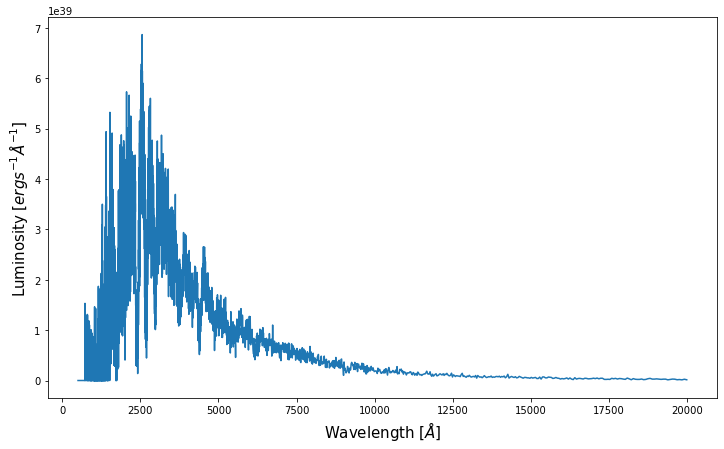

In [2]:
import matplotlib.pyplot as plt
_, ax = plt.subplots(figsize=(12,7))
ax.plot(sim.runner.spectrum.wavelength, sim.runner.spectrum.luminosity_density_lambda)
ax.set_xlabel('Wavelength [$\AA$]', fontsize=15)
ax.set_ylabel('Luminosity [$erg {s}^{-1} {\AA}^{-1}$]', fontsize=15);

### What is the purpose of creating Supernova "Model"?
- To draw conclusions about the properties of a Supernova observed in the Sky.
- Researchers make some educated guesses about the properties of an observed Supernova from its spectrum.
- And then pass them as input parameters to software like TARDIS to run a simulation for calculating theoretical (or modeled) spectrum.
- They keep tuning input parameters until they find a close match between the two. Hence they identify properties that actually define Supernova.

<img src="images/matching-spectra.png" alt="Spectra Matching" />
<p style="text-align: center; color: gray; width: 650px; margin: 0 auto;">Observed spectrum of the Supernova 2011ay after 7 days of explosion (red) and theoretical spectrum from the fit of the velocity-dependent TARDIS model (blue). [Source: Figure 2 in Barna et al. 2017]</p>

#### What are these annotations in here?
- These are **ion species** present in Supernova ejecta, responsible for producing peaks or valleys in its spectrum

Roman Numeral | Electrons removed from atom
-- | --
I | 0
II | 1
III | 2
..so on

- For example, Na II is Na+:

<img src="images/atom-to-ion.gif" alt="Spectra Matching" />

## Problem: Difficulties in Data Exploration
To make you understand the kind of problems we solve at TARDIS, I'll show the problem I worked on during GSoC'20.

### Large amount of hierarchical Data
There's so much data stored in Supernova model that it becomes difficult to explore it unless user already know its internal structure.

To see how that structure looks like, let's explore the properties within the model we prepared i.e. `sim` object.

In [3]:
# Helper function to print out properties and their data types
def list_types(properties_dict):
    for k, v in properties_dict.items():
        print(f"{k:40} {type(v)}")

In [4]:
list_types(sim.get_properties())

model                                    <class 'tardis.model.base.Radial1DModel'>
plasma                                   <class 'tardis.plasma.base.BasePlasma'>
runner                                   <class 'tardis.montecarlo.base.MontecarloRunner'>
iterations_w                             <class 'numpy.ndarray'>
iterations_t_rad                         <class 'astropy.units.quantity.Quantity'>
iterations_electron_densities            <class 'numpy.ndarray'>
iterations_t_inner                       <class 'astropy.units.quantity.Quantity'>


In [5]:
list_types(sim.model.get_properties())

t_inner                                  <class 'astropy.units.quantity.Quantity'>
w                                        <class 'numpy.ndarray'>
t_radiative                              <class 'astropy.units.quantity.Quantity'>
v_inner                                  <class 'astropy.units.quantity.Quantity'>
v_outer                                  <class 'astropy.units.quantity.Quantity'>
homologous_density                       <class 'tardis.model.density.HomologousDensity'>
time_explosion                           <class 'astropy.units.quantity.Quantity'>


In [6]:
list_types(sim.runner.get_properties())

output_nu                                <class 'astropy.units.quantity.Quantity'>
output_energy                            <class 'astropy.units.quantity.Quantity'>
nu_bar_estimator                         <class 'numpy.ndarray'>
j_estimator                              <class 'numpy.ndarray'>
montecarlo_virtual_luminosity            <class 'astropy.units.quantity.Quantity'>
last_interaction_in_nu                   <class 'numpy.ndarray'>
last_interaction_type                    <class 'numpy.ndarray'>
last_line_interaction_in_id              <class 'numpy.ndarray'>
last_line_interaction_out_id             <class 'numpy.ndarray'>
last_line_interaction_shell_id           <class 'numpy.ndarray'>
packet_luminosity                        <class 'astropy.units.quantity.Quantity'>
spectrum                                 <class 'tardis.montecarlo.spectrum.TARDISSpectrum'>
spectrum_virtual                         <class 'tardis.montecarlo.spectrum.TARDISSpectrum'>
spectrum_reabsorbed        

In [7]:
list_types(sim.runner.spectrum.get_properties())

_frequency                               <class 'astropy.units.quantity.Quantity'>
luminosity                               <class 'astropy.units.quantity.Quantity'>


...and so on!

### Repeated querying makes data exploration tiresome
Let's try to explore a multi-level dataframe containing information of number of ions per unit volume, for each element in each shell of Supernova ejecta.

In [8]:
sim.plasma.ion_number_density

0             1             2  \
atomic_number ion_number                                             
8             0           1.324761e+03  5.952058e+02  2.793002e+02   
              1           5.393189e+08  4.094770e+08  3.140455e+08   
              2           1.080154e+05  1.977689e+05  3.421276e+05   
              3           4.188090e-09  2.577978e-08  1.359761e-07   
              4           0.000000e+00  0.000000e+00  0.000000e+00   
...                                ...           ...           ...   
20            16          0.000000e+00  0.000000e+00  0.000000e+00   
              17          0.000000e+00  0.000000e+00  0.000000e+00   
              18          0.000000e+00  0.000000e+00  0.000000e+00   
              19          0.000000e+00  0.000000e+00  0.000000e+00   
              20          0.000000e+00  0.000000e+00  0.000000e+00   

                                     3             4             5  \
atomic_number ion_number                                             
8             0           1.554372e+02  1.000945e+02  6.411803e+01   
              1           2.431918e+08  1.900929e+08  1.498163e+08   
              2           4.107893e+05  3.627071e+05  3.375358e+05   
              3           2.801399e-07  2.612037e-07  2.761858e-07   
              4           0.000000e+00  0.000000e+00  0.000000e+00   
...                                ...           ...           ...   
20            16          0.000000e+00  0.000000e+00  0.000000e+00   
              17          0.000000e+00  0.000000e+00  0.000000e+00   
              18          0.000000e+00  0.000000e+00  0.000000e+00   
              19          0.000000e+00  0.000000e+00  0.000000e+00   
              20          0.000000e+00  0.000000e+00  0.000000e+00   

                                     6             7             8  \
atomic_number ion_number                                             
8             0           3.786691e+01  2.415435e+01  1.767929e+01   
              1           1.189125e+08  9.509554e+07  7.666125e+07   
              2           3.960123e+05  3.999847e+05  3.005214e+05   
              3           5.236075e-07  6.725802e-07  4.028053e-07   
              4           0.000000e+00  0.000000e+00  0.000000e+00   
...                                ...           ...           ...   
20            16          0.000000e+00  0.000000e+00  0.000000e+00   
              17          0.000000e+00  0.000000e+00  0.000000e+00   
              18          0.000000e+00  0.000000e+00  0.000000e+00   
              19          0.000000e+00  0.000000e+00  0.000000e+00   
              20          0.000000e+00  0.000000e+00  0.000000e+00   

                                     9            10            11  \
atomic_number ion_number                                             
8             0           1.219964e+01  8.890009e+00  7.191726e+00   
              1           6.215853e+07  5.072919e+07  4.167529e+07   
              2           2.680375e+05  2.160279e+05  1.393098e+05   
              3           3.715395e-07  2.628827e-07  1.046030e-07   
              4           0.000000e+00  0.000000e+00  0.000000e+00   
...                                ...           ...           ...   
20            16          0.000000e+00  0.000000e+00  0.000000e+00   
              17          0.000000e+00  0.000000e+00  0.000000e+00   
              18          0.000000e+00  0.000000e+00  0.000000e+00   
              19          0.000000e+00  0.000000e+00  0.000000e+00   
              20          0.000000e+00  0.000000e+00  0.000000e+00   

                                    12            13            14  \
atomic_number ion_number                                             
8             0           5.322569e+00  4.296996e+00  3.596021e+00   
              1           3.439286e+07  2.854517e+07  2.380824e+07   
              2           1.140782e+05  7.768850e+04  4.963800e+04   
              3           7.621882e-08  3.4

In [9]:
# Ions in shell=0, atomic_number=8
sim.plasma.ion_number_density.loc[:, 0].loc[8]

ion_number
0    1.324761e+03
1    5.393189e+08
2    1.080154e+05
3    4.188090e-09
4    0.000000e+00
5    0.000000e+00
6    0.000000e+00
7    0.000000e+00
8    0.000000e+00
Name: 0, dtype: float64

In [10]:
# shell=14, atomic_number=12 <-- need to knoe atomic_number=12 exists in dataset beforehand
sim.plasma.ion_number_density.loc[:, 14].loc[12]

ion_number
0     1.796211e-10
1     1.623286e+00
2     2.479696e+06
3     9.188486e-18
4     0.000000e+00
5     0.000000e+00
6     0.000000e+00
7     0.000000e+00
8     0.000000e+00
9     0.000000e+00
10    0.000000e+00
11    0.000000e+00
12    0.000000e+00
Name: 14, dtype: float64

This soon gets tedious if you have to do it 10-15 times more, we need something quick to make an enquiry in our data!

Besides the above example was just a simple exploration of a dataframe. Real use cases requires fairly complex data manipulation on several properties, before exploring each row.

<br>

> Before we move further, what can be possible solution to this problem according to you?

<br>

## Solution: TARDIS Widgets
To make exploration of Supernova models easier, I created TARDIS Widgets - a set of graphical interfaces that can run within notebooks.

When you work with one Open Source package, you also get to work with other Open Source packages to build something better by combining all of their strengths. For developing these TARDIS Widgets, I used several other Open Source Python libraries:
- **Jupyter Widgets** - For UI controls and layout different components
- **Qgrid** - For interactive tables which support row selection events
- **Plotly** - For beautiful interactive visualizations

TARDIS widgets can be accessed from the `widgets` subpackage within `tardis`, so let's import them:

In [11]:
import tardis.widgets as tw

### Shell Info Widget
This widget allows you to explore <u>chemical abundances</u> of each <u>shell</u>.

<img src="images/supernova-shells.jpg" alt="Packet Interactions" width="500"/>

<p style="text-align: center; color: gray; width: 650px; margin: 0 auto;">Artist’s Impression of supernova 1993J — ESA/Hubble</p>
                                
- When star explodes, the elements that were cooking inside the star get ejected out as this spherical envelop of plasma which keeps expanding outwards.
- <u>Shells</u> are the computational partitions of the ejecta at which TARDIS calculates properties.
- <u>Chemical abundances</u> are the amount of different chemical elements present in each shell of the ejcta.

To generate shell info widget, we will pass the simulation object `sim` to the widget constructor and then simply display it.

In [12]:
shell_info_widget = tw.shell_info_from_simulation(sim)
shell_info_widget.display()

By just clicking on the rows in tables, you can explore all the way from shells to elements, ions and then levels. 

<br>

> OK take a break for a while, and think about what does (or does not) make sense so far?

### Line Info Widget
This widget allows you to explore the <u>atomic lines</u> responsible for producing <u>features</u> in the simulated <u>spectrum</u>.

<img src="images/packets-interaction.png" alt="Packet Interactions" width="700"/>

- When a star explodes, millions of the light packets escape its core. And in their way out, they interact with multiple elements present in the ejecta.
- At quantum level, an interaction is simply absorption or emission of light packet's energy by the electron to jump up to a higher energy level or jump down to a lower energy level.
- All of these unique possible transitions of electrons between different energy levels of a specific atom, are called <u>atomic lines</u>.


TARDIS does the hard job of simulating each of these random light-matter interactions to determine properties of model. Here's a cool animation to demonstrate it:

<img src="images/tardis-animation.gif" alt="TARDIS Animation" width="700"/>
<p style="text-align: center; color: gray; width: 650px; margin: 0 auto;">Light packets (black dots) travelling through the expanding layers of an exploding star</p>

- When we observe the light from Supernova, it consists of these millions of packets which have different wavelengths.
- That's why when we pass that light from a prism, it gets diverged to reveal a range of wavelengths (colors), hence the name <u>spectrum</u>.
- If we also show luminosity (measure of energy emitted per unit time) on Y-axis, we can represent the spectrum as a 2-D plot.


<img src="images/absorption-emission.gif" alt="Absorption Emission Spectrum" width="500"/>

- Now, the interesting thing is that this spectrum is never smooth due to the light-matter interactions I explained above.
- Because of these interactions, light packets either gain extra energy causing peaks in spectrum or lose energy causing valleys in spectrum.
- These peaks and valleys in the spectrum are called <u>features</u> because they are characteristic to a specific element, acting as its fingerprint.
- This becomes very helpful for researchers since they can determine chemical elements present in Supernova ejecta  from the irregularities in its light spectrum.

<br>

> Phew! This was a lot to process - time for another break to let it sink in! :)

<br>

To generate line info widget, we will again use the simulation object `sim` and then display the widget:

In [13]:
line_info_widget = tw.LineInfoWidget.from_simulation(sim)
line_info_widget.display()

    'data': [{'name': 'Real packets',
              'type': 'scatter',
         …

You can select any wavelength range in the spectrum interactively to display a table giving the fraction of packets that experienced their last interaction with each species. Using toggle buttons, you can specify whether to filter the selected range by the emitted or absorbed wavelengths of packets.

Clicking on a row in the species table, shows packet counts for each last line interaction of the selected species, which can be grouped in several ways.

## How did TARDIS help me evolve?
I think more than what I did to improve TARDIS, it helped me inturn to improve myself in several areas:

### Software Development: From Python Scripts to Packages
- Learning things essential to almost Software Engineering projects:
    - Git and code collaboration
    - Best practices like code style, etc.
    - Object-oriented Programming
    - Writing Unit-tests
    - Documenting everything - code comments, docstrings and demo in docs


- Working with several new technologies specific to project: Jupyter Widgets, Plotly, HTML/CSS/JS


- Improves problem solving capabilities - realization that you can eventually solve problems you have no idea of
<!-- difficulties like plotly to ipywidgets communication -->

### Communication: From texting to live video session
- Giving weekly reports of the work and discussions about how to move further
- Hacking together on several issues
- Getting chance to interact with a globally diverse team

### Astronomy: From edutainment videos to professional Astrophysicists
- Learning Astrophysics concepts directly from the professional Researchers
- Understanding real-world application of the Physics we study in High School - my 12th grade chapter about Atomic Physics connects here in Line Info Widget

## Why should YOU contribute to TARDIS?
### Self-evolution
- For becoming a better Software Developer - like I shared my experience
- To learn something new for fun!

### Leveraging up your Career
- Live showcase of your skills because anyone can openly see your code
- Value of FOSS contribution in your portfolio


### Making an impact
- For learning about how Astrophysics Research happens
- Your small contribution will help make research of Supernovae easier which inturns help in advancing the collective human understanding of Universe

## How to get started?
- Gain some basic knowledge about opening issues and PRs on GitHub
- Set up TARDIS locally and run Quickstart  in our docs
- Find issues or choose from the ones we already have, start fixing it
- Check out our project boards or TEPs for more ideas where we need help
- Contact us on Gitter - https://gitter.com/tardis_sn
- Need some inspiration & roadmap: check out our Contributor Guidelines - https://tardis-sn.github.io/tardis/CONTRIBUTING.html